# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
path = '../data/processed/pairwise_comparison/pairwise_comparison_flash_thinking.json'

In [3]:
data = pd.read_json(path)
data.head()

,paper_id,paper_title,paper_abstract,review_ids,review_writers,review_contents,sentiment,sentiment_reason,tone,tone_reason,consistency,consistency_reason,pairwise_comparison
0,iclr_2021_IFqrg1p5Bc,Distance-Based Regularisation of Deep Networks...,We investigate approaches to regularisation du...,"[GUlmylQMl3, pc1JzK8Hlux, TdQmSVH7w_w, LKQ3ydP...","[official_reviewer, official_reviewer, officia...",[This paper proposes new regularization method...,"[Negative, Positive, Positive, Positive, Negat...",[The review expresses significant concerns abo...,"[Critical, Neutral, Balanced, Supportive, Crit...","[The review uses phrases like 'misleading,' 'i...","[Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, ...","[The review is consistent in its critique, foc...","[{'review_id': 'GUlmylQMl3', 'comparison': {'i..."
1,nips_2021_khZGbgRQjjM,Stylized Dialogue Generation with Multi-Pass D...,"Stylized dialogue generation, which aims to ge...","[O8vM_cMz9y-, T2ikjIJ68m8, TPQmV9oN9dh, QaXWYZ...","[official_reviewer, official_reviewer, officia...",[ Thanks a lot for addressing my concerns.\nTh...,"[Positive, Neutral, Positive, Positive, Neutra...",[The reviewer expresses gratitude ('Thanks a l...,"[Supportive, Balanced, Supportive, Balanced, N...",[The reviewer uses phrases like 'Thanks a lot'...,"[Yes, Yes, Yes, Yes, Yes, Yes, Yes]",[The review expresses positive feedback regard...,"[{'review_id': 'O8vM_cMz9y-', 'comparison': {'..."
2,nips_2022_kK200QKfvjB,Feature Learning in $L_2$-regularized DNNs: At...,We study the loss surface of DNNs with $L_{2}$...,"[s4bgf5KBgI2, AcUsOCVG5bu, WYWk9_4Lhe8, WtkW3F...","[official_reviewer, official_reviewer, officia...","[ Dear authors,\n\nThanks for the extensive cl...","[Positive, Positive, Neutral, Neutral, Positiv...",[The reviewer expresses satisfaction with the ...,"[Balanced, Supportive, Critical, Balanced, Bal...","[The tone is balanced, acknowledging the paper...","[Yes, Yes, Yes, Yes, Yes, Yes]",[The review is consistent as the reviewer expr...,"[{'review_id': 's4bgf5KBgI2', 'comparison': {'..."
3,iclr_2020_BkgNqkHFPr,Enhanced Convolutional Neural Tangent Kernels,Recent research shows that for training with l...,"[Byxqt4VztH, ryltv8TTFB, H1eOHZN2or, S1gzyEd6FH]","[official_reviewer, official_reviewer, officia...",[This paper shows that there is a one-to-one c...,"[Negative, Negative, Positive, Neutral]",[The reviewer expresses significant concerns a...,"[Critical, Critical, Supportive, Critical]","[The review uses direct and critical language,...","[Yes, Yes, Yes, Yes]",[The review is consistent because the reviewer...,"[{'review_id': 'Byxqt4VztH', 'comparison': {'i..."
4,iclr_2019_B1lfHhR9tm,The Natural Language Decathlon: Multitask Lear...,Deep learning has improved performance on many...,"[rJliXSXJ1E, Syx1siQK37, H1eWSvGJk4, BklnA4fky...","[official_reviewer, official_reviewer, officia...",[Thank you for replying. I understand the poi...,"[Positive, Positive, Positive, Positive, Posit...",[The reviewer expresses gratitude and acknowle...,"[Supportive, Balanced, Supportive, Balanced, S...",[The reviewer is supportive by acknowledging t...,"[Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, Yes, ...",[The reviewer explicitly states they updated t...,"[{'review_id': 'rJliXSXJ1E', 'comparison': {'i..."


# Processing

In [4]:
pairwise_comparison = data['pairwise_comparison']
for pair in pairwise_comparison:
    for each_pair in pair:
        print(each_pair.keys())
        print(each_pair['comparison'].keys())
        break
    break

dict_keys(['review_id', 'comparison'])
dict_keys(['is_consistent_with_others', 'alignment_score', 'contradictory_points', 'possible_bias_flags', 'summary_of_differences'])


In [5]:
comparison = data[['pairwise_comparison', 'review_contents']]

review_id = []
is_consistent_with_others = []
alignment_score = []
contradictory_points = []
possible_bias_flags = []
summary_of_differences = []
current_review = []
other_reviews = []

for pair, reviews in tqdm(zip(comparison['pairwise_comparison'], comparison['review_contents'])):
    for each_pair in pair:
        current_index = pair.index(each_pair)
        
        current_review.append(reviews[current_index])
        other_rev = [rev for i, rev in enumerate(reviews) if i != current_index]
        other_reviews.append('\n'.join(other_rev))
        
        review_id.append(each_pair['review_id'])
        is_consistent_with_others.append(each_pair['comparison']['is_consistent_with_others'])
        alignment_score.append(each_pair['comparison']['alignment_score'])
        contradictory_points.append(each_pair['comparison']['contradictory_points'])
        possible_bias_flags.append(each_pair['comparison']['possible_bias_flags'])
        summary_of_differences.append(each_pair['comparison']['summary_of_differences'])

df = pd.DataFrame({
    'review_id': review_id,
    'is_consistent_with_others': is_consistent_with_others,
    'alignment_score': alignment_score,
    'contradictory_points': contradictory_points,
    'possible_bias_flags': possible_bias_flags,
    'summary_of_differences': summary_of_differences,
    'current_review': current_review,
    'other_reviews': other_reviews
})

print(f"The length of dataframe is: {len(df)}")

200it [00:00, 6009.29it/s]

The length of dataframe is: 1043


In [6]:
df.head()

,review_id,is_consistent_with_others,alignment_score,contradictory_points,possible_bias_flags,summary_of_differences,current_review,other_reviews
0,GUlmylQMl3,True,7.0,No contradictory points,No possible bias flags,Review 1 provides a detailed critique of the t...,This paper proposes new regularization methods...,The reviewer thanks the authors for the respon...
1,pc1JzK8Hlux,True,3.0,No contradictory points,No possible bias flags,The current review is a short acknowledgement ...,The reviewer thanks the authors for the respon...,This paper proposes new regularization methods...
2,TdQmSVH7w_w,False,5.0,Review 1 praises the theoretical motivation an...,Review 1 might be biased towards theoretical n...,Review 1 is more positive in its overall asses...,This paper studies regularization for neural n...,This paper proposes new regularization methods...
3,LKQ3ydPIzdw,False,3.0,No contradictory points,No possible bias flags,The current review is a very short positive st...,Thank you for the update! I have updated my re...,This paper proposes new regularization methods...
4,f2loxf--1wI,True,5.0,No contradictory points,The review heavily emphasizes performance comp...,The current review primarily focuses on the su...,Thanks for all the clarifications. \n\nTo clar...,This paper proposes new regularization methods...


In [7]:
df.nunique()

review_id                    1043
is_consistent_with_others       2
alignment_score                11
contradictory_points          253
possible_bias_flags           271
summary_of_differences       1038
current_review               1042
other_reviews                1043
dtype: int64

In [8]:
df.isna().sum()

review_id                    0
is_consistent_with_others    0
alignment_score              0
contradictory_points         0
possible_bias_flags          0
summary_of_differences       0
current_review               0
other_reviews                0
dtype: int64

# EDA

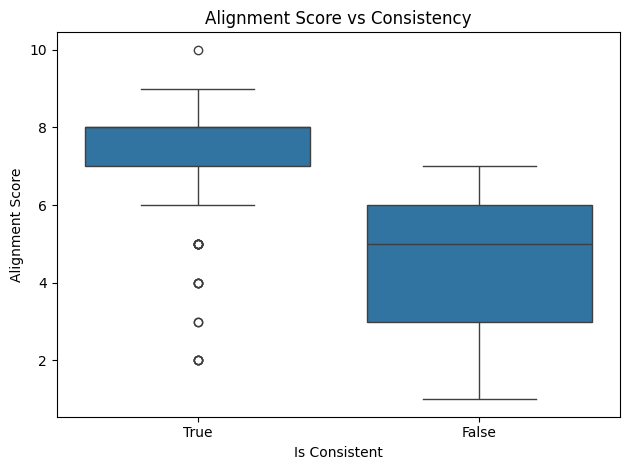

In [9]:
sns.boxplot(x='is_consistent_with_others', y='alignment_score', data=df)
plt.title("Alignment Score vs Consistency")
plt.xlabel("Is Consistent")
plt.ylabel("Alignment Score")
plt.tight_layout()
plt.show()

In [11]:
# The higher the alignment score, better the chance of the consistency to be True.
# Outliers are still present in the True consistency column, where the review is said to be consistent with others and still got low alignment score or vice versa

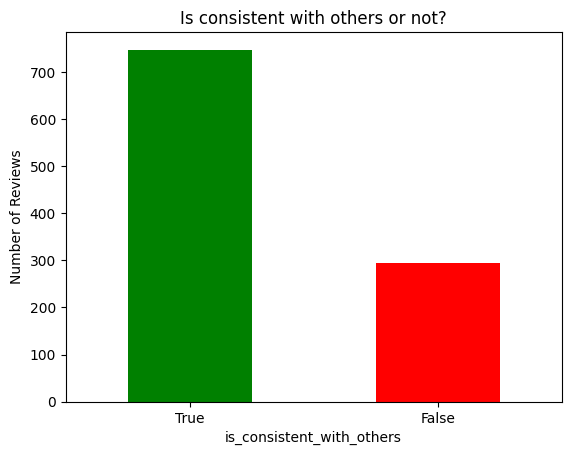

In [12]:
df['is_consistent_with_others'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Is consistent with others or not?")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

In [13]:
# The LLM labelled that there are high reviews where the review is consistent with other reviews
# There still are nearly 25% chance of the review to be not consistent with the other reviews.

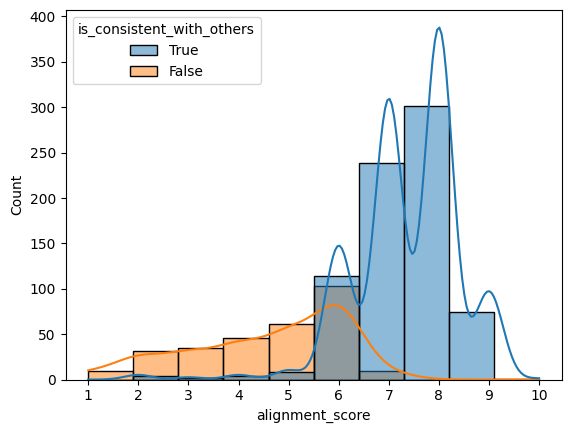

In [14]:
sns.histplot(data=df, x='alignment_score', hue='is_consistent_with_others', bins=10, kde=True)
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [15]:
# The kde distribution of the alignment score with hue of being consistent is shown.
# The higher the alignment score, better the chances of the review to be consistent.
# The lower the alignment score, higher the chances of the review to be inconsistent. 

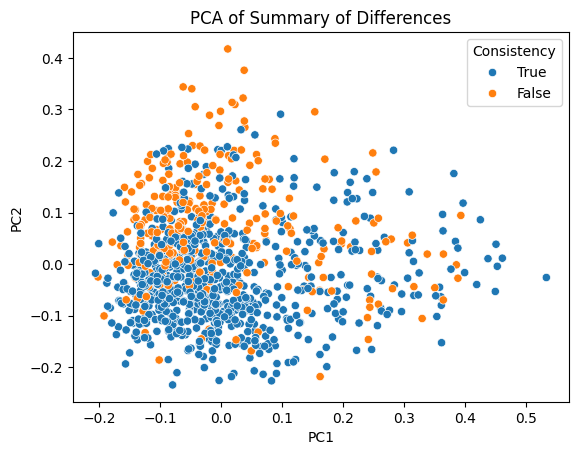

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import pandas as pd

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(df['summary_of_differences'].fillna(''))
X_pca = PCA(n_components=2).fit_transform(X.toarray())

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Consistency'] = df['is_consistent_with_others']

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Consistency')
plt.title("PCA of Summary of Differences")
plt.show()

In [17]:
# The 500D space may have some different results but the results are not clearly interpretable in this 2D space

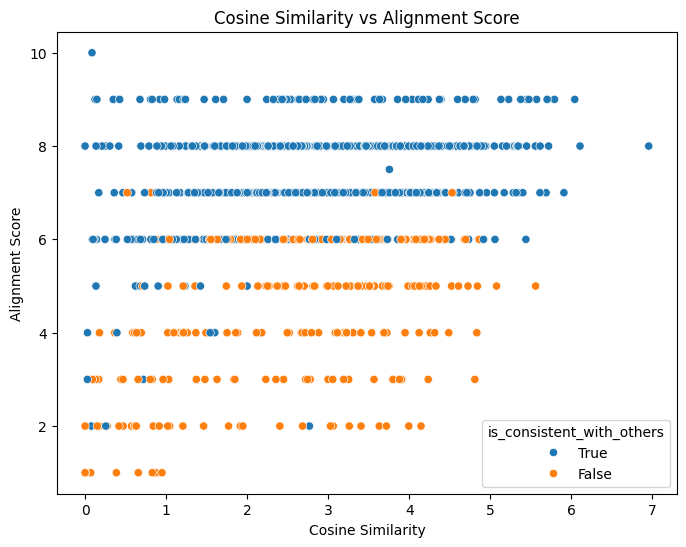

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

tfidf = TfidfVectorizer(stop_words='english')

def calculate_cosine_similarity(current_review, other_review):
    if not current_review or not other_review:
        return 0.0
    
    tfidf_matrix = tfidf.fit_transform([current_review, other_review])
    
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    return cosine_sim[0][0]

cosine_similarities = []
for idx, row in df.iterrows():
    current_review = row['current_review']
    other_review = row['other_reviews']
    cosine_sim = calculate_cosine_similarity(current_review, other_review)
    cosine_similarities.append(cosine_sim*10)

df['cosine_similarity'] = cosine_similarities

df['similarity_vs_alignment'] = df['alignment_score'] - df['cosine_similarity']


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['cosine_similarity'], y=df['alignment_score'], hue=df['is_consistent_with_others'])  #,c=df['similarity_vs_alignment'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Cosine Similarity')
plt.ylabel('Alignment Score')
plt.title('Cosine Similarity vs Alignment Score')
plt.show()

In [20]:
# Cosine similarity is multiplied with 10 to make it in the scla eof alignment score
# Cosine similarity between the Current Review and Other Reviews of the same paper is calculated and multiplied by 10
# Then Cosine Similarity vs Alignment score is plotted with the hue of review being consistent

# If the cosine similarity and alignment score match in terms of low score, the better the chances of review being inconsistent. 
# Same pattern is observed for high score